In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/training"
dataset_dirs = os.listdir(dataset_path)

In [3]:
len(dataset_dirs)

7769

In [4]:
data = []

In [5]:
for i in tqdm(dataset_dirs):
    with open(f"{dataset_path}/{i}", 'r') as f:
        content = f.read()
        data.append(content)


100%|██████████| 7769/7769 [00:00<00:00, 17796.14it/s]


In [6]:
data[0]

'BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  middlemen, exporters and processors.\n  

In [7]:
train, val = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train

['CHEMFIX TECHNOLOGIES INC &lt;CFIX> 2ND QTR NET\n  Ended Feb 28\n      Shr profit one ct vs loss four cts\n      Net profit 53,040 vs loss 255,568\n      Revs 2,252,246 vs 755,605\n      Six mths\n      Shr profit three cts vs loss eight cts\n      Net profit 217,884 vs loss 517,538\n      Revs 4,895,720 vs 1,569,662\n  \n\n',
 'EC FARM LOBBIES BACK OILS AND FATS "TAX" PLAN\n  The European Community (EC) farmers\'\n  and farm cooperatives lobbies, Copa and Cogeca, have backed the\n  EC Commission plan for an oils and fats price stabilisation\n  mechanism, claiming it would not harm consumers.\n      In a letter to Belgian Foreign Minister Leo Tindemans,\n  current president of the EC Council of Ministers, they said the\n  mechanism, often referred to as a tax, would in fact subsidise\n  oils and fats prices in the EC under some circumstances.\n      This would have been the case in May 1984, when soya oil\n  prices cif Rotterdam stood at 914 dlrs a tonne, they noted.\n      If such pr

In [9]:
df = pd.DataFrame(data, columns=['text'])
print(type(df['text']))

<class 'pandas.core.series.Series'>


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [12]:
dtm = cv.fit_transform(pd.Series(train))

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
dtm_val = cv.fit_transform(pd.Series(val))

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\nawee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nawee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


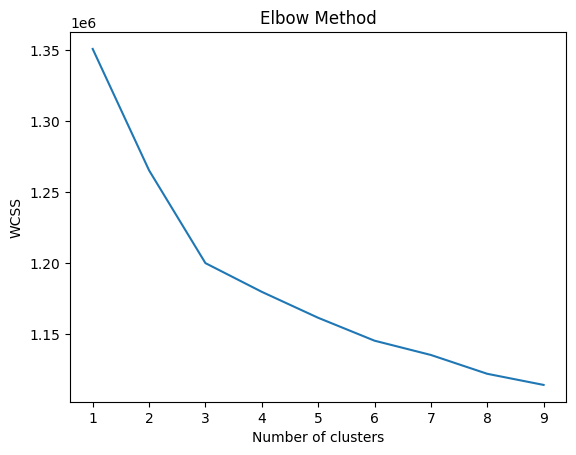

In [16]:
from sklearn.cluster import KMeans
from tqdm import tqdm
wcss = []
for i in tqdm(range(1, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dtm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


100%|██████████| 8/8 [00:17<00:00,  2.17s/it]


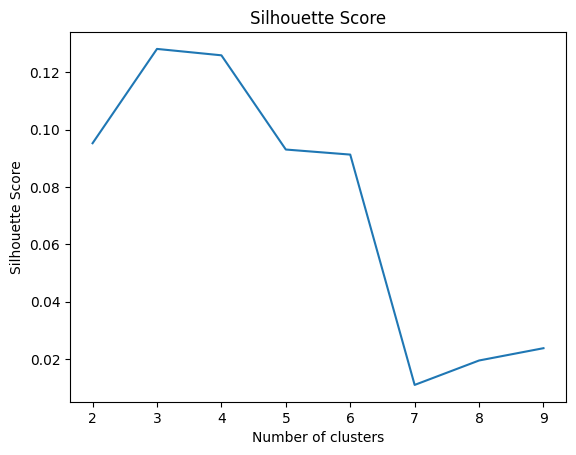

In [17]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dtm)
    silhouette_avg = silhouette_score(dtm, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()